# Analysis of gold and silver performance over the last 30 years

In [1]:
import fredapi as fa
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt

### Data loading

Data for both [gold](https://www.investing.com/currencies/xau-usd-historical-data) and [silver](https://www.investing.com/currencies/xag-usd-historical-data) prices was downloaded from [investing.com](https://www.investing.com/) website and include time series of the last 30 years. I was able to download up to 5000 rows at once, therefore there are two separate csv files per each metal.

In [2]:
silver = pd.read_csv('XAG_USD Historical Data.csv', usecols=["Date", "Price", "Change %"], index_col="Date", parse_dates=['Date'])
silver_2= pd.read_csv('XAG_USD Historical Data_2.csv', usecols=["Date","Price", "Change %"], index_col="Date", parse_dates=['Date'])
gold = pd.read_csv('XAU_USD Historical Data.csv', usecols=["Date", "Price", "Change %"], index_col="Date", parse_dates=['Date'])
gold_2 = pd.read_csv('XAU_USD Historical Data_2.csv', usecols=["Date", "Price", "Change %"], index_col="Date", parse_dates=['Date'])

In [3]:
# Concatenating csv files
df_silver = pd.concat([silver, silver_2])
df_gold = pd.concat([gold_2, gold])

### Data cleaning

In [4]:
# Renaming columns
df_silver.rename(columns={'Price':'price','Change %':'pct_change'}, inplace=True)
df_gold.rename(columns={'Price':'price','Change %':'pct_change'}, inplace=True)

Checking column types

In [5]:
print(f'Gold:\n {df_gold.dtypes}\n')
print(f'Silver:\n {df_silver.dtypes}')

Gold:
 price         object
pct_change    object
dtype: object

Silver:
 price         float64
pct_change     object
dtype: object


In [6]:
# Converting gold price from string to float
df_gold['price'] = df_gold['price'].str.replace(',', '').astype(float)

In [7]:
# Converting pct_change columns in both datasets to numeric
df_gold['pct_change'] = df_gold['pct_change'].str.replace('%','').astype(float)
df_silver['pct_change'] = df_silver['pct_change'].str.replace('%','').astype(float)

Checking whether both dataset are complete

In [8]:
len(df_silver) == len(df_gold)

False

In [9]:
# Merging both datasets 

df_combined = df_silver.merge(df_gold, left_index=True, right_index=True, how='outer', suffixes=('_silver', '_gold'))

In [10]:
df_combined = df_combined.sort_index()

In [11]:
df_combined.head()

,price_silver,pct_change_silver,price_gold,pct_change_gold
Date,,,,
1995-01-02,4.89,0.00,383.15,0.08
1995-01-03,4.75,-2.86,379.70,-0.90
1995-01-04,4.62,-2.74,374.55,-1.36
1995-01-05,4.71,1.95,375.55,0.27
1995-01-06,4.64,-1.49,371.95,-0.96


In [12]:
# Identifying missing values

df_combined[(df_combined['price_silver'].isnull()) | (df_combined['price_gold'].isnull())]

,price_silver,pct_change_silver,price_gold,pct_change_gold
Date,,,,
1995-12-25,NaN,NaN,387.50,0.06
2006-01-02,8.84,0.23,NaN,NaN
2014-12-25,15.74,0.13,NaN,NaN
2018-12-25,14.78,0.03,NaN,NaN
2019-04-19,14.93,-0.40,NaN,NaN
2019-12-25,NaN,NaN,1499.55,0.00


Remarks:

4 out of 6 missing values concerns 25/12 (Christmas). I have checked whether metals were traded on that day in other years.

In [13]:
df_combined['day'] = df_combined.index.day
df_combined['month'] = df_combined.index.month

In [14]:
df_combined[(df_combined['day'] == 25) & (df_combined['month'] == 12)]

,price_silver,pct_change_silver,price_gold,pct_change_gold,day,month
Date,,,,,,
1995-12-25,NaN,NaN,387.50,0.06,25,12
1996-12-25,4.8500,0.00,368.90,0.01,25,12
1997-12-25,6.3900,0.00,296.75,0.10,25,12
1998-12-25,4.9400,0.00,286.75,0.14,25,12
2000-12-25,4.6200,0.00,274.05,0.04,25,12
2001-12-25,4.5400,0.00,279.50,0.52,25,12
2002-12-25,4.6500,0.00,345.50,-0.39,25,12
2003-12-25,5.7700,0.00,412.00,0.00,25,12
2006-12-25,12.5900,-0.08,620.75,-0.04,25,12


Both metals changed its price on 25/12 several times which means they are tradable on this day. Therefore I have not removed the rows with missing values. 

Since there are only 2 missing data points for silver and 4 for gold, I have checked corresponding prices on [TradingView](https://www.tradingview.com/symbols/SILVER/?exchange=TVC) and imputed them manually:

imputed silver prices
- 1995-12-25 ==> 5.16
- 2019-12-25 ==> 17.765

imputed gold prices

- 2006-01-02 ==> 517.12
- 2014-12-25 ==> 1173.6
- 2018-12-25 ==> 1269.8
- 2019-04-19 ==> 1275.51

In addition, percentage change is calculated based on imputed values.

In [15]:
df_imputed = df_combined.copy()

In [16]:
# silver
df_imputed.loc["1995-12-25", ["price_silver", "pct_change_silver"]] = [5.16, (5.16 / df_imputed["price_silver"].shift(1).loc["1995-12-25"] - 1) * 100]
df_imputed.loc["2019-12-25", ["price_silver", "pct_change_silver"]] = [17.765, (17.765 / df_imputed["price_silver"].shift(1).loc["2019-12-25"] - 1) * 100]
# gold
df_imputed.loc["2006-01-02", ["price_gold", "pct_change_gold"]] = [517.12, (517.12 / df_imputed["price_gold"].shift(1).loc["2006-01-02"] - 1) * 100]
df_imputed.loc["2014-12-25", ["price_gold", "pct_change_gold"]] = [1173.6, (1173.6 / df_imputed["price_gold"].shift(1).loc["2014-12-25"] - 1) * 100]
df_imputed.loc["2018-12-25", ["price_gold", "pct_change_gold"]] = [1269.8, (1269.8 / df_imputed["price_gold"].shift(1).loc["2018-12-25"] - 1) * 100]
df_imputed.loc["2019-04-19", ["price_gold", "pct_change_gold"]] = [1275.51, (1275.51 / df_imputed["price_gold"].shift(1).loc["2019-04-19"] - 1) * 100]

In [17]:
# check
df_imputed[df_imputed.index.isin(['1995-12-25', '2006-01-02','2014-12-25', '2018-12-25', '2019-04-19', '2019-12-25'])]

,price_silver,pct_change_silver,price_gold,pct_change_gold,day,month
Date,,,,,,
1995-12-25,5.160,-0.193424,387.50,0.060000,25,12
2006-01-02,8.840,0.230000,517.12,-0.092736,2,1
2014-12-25,15.740,0.130000,1173.60,-0.017039,25,12
2018-12-25,14.780,0.030000,1269.80,0.052792,25,12
2019-04-19,14.930,-0.400000,1275.51,0.009409,19,4
2019-12-25,17.765,-0.112454,1499.55,0.000000,25,12


### Data analysis

Plotting a histogram of simple daily returns for both metals and comparing their distribution.

In [18]:
plt.style.available # choosing the style for charts

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

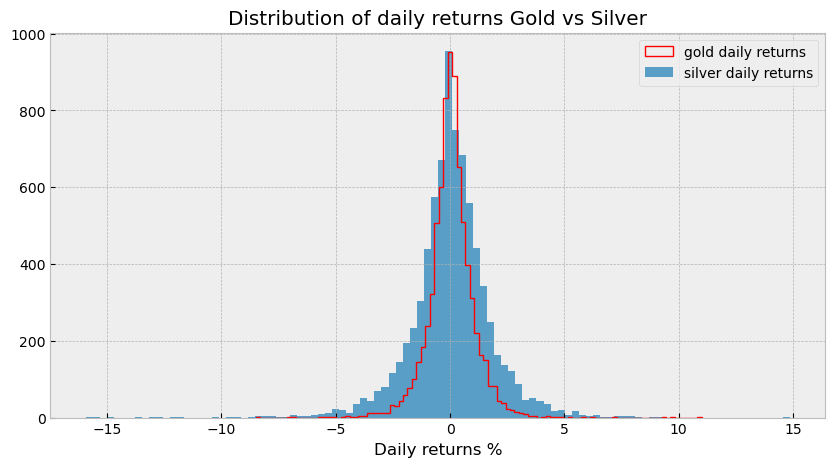

In [19]:
# Histogram of daily returns
plt.style.use('bmh')
plt.figure(figsize=(10,5))
plt.hist(df_imputed['pct_change_gold'], bins=100, histtype='step', linewidth=1, color='red', label='gold daily returns')
plt.hist(df_imputed['pct_change_silver'], bins=100, alpha = 0.8, label='silver daily returns')
plt.title('Distribution of daily returns Gold vs Silver')
plt.xlabel('Daily returns %')
plt.legend()
plt.show()

The histogram shows the significant difference between simple daily returns of gold and silver. Silver is clearly much more volatile (the distribution is wider compared to gold).

### Simple returns year by year

In [20]:
silver_annual_returns = (
    df_imputed['price_silver']
    .resample('Y')
    .last()
    .pct_change()
    .mul(100)
    .to_frame()
    .rename(columns={'price_silver':'returns'})
)    
silver_annual_returns.dropna(inplace=True)

In [21]:
silver_annual_returns.head()

,returns
Date,
1996-12-31,-7.899807
1997-12-31,25.523013
1998-12-31,-16.000000
1999-12-31,7.539683
2000-12-31,-15.129151


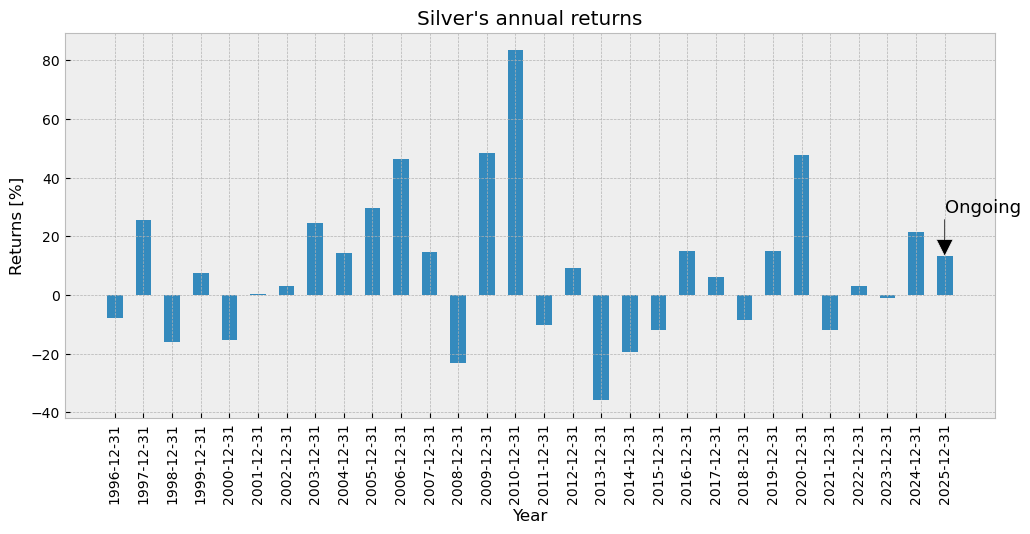

In [22]:
plt.figure(figsize=(12,5)) 
plt.bar(silver_annual_returns.index, silver_annual_returns['returns'], width=200) 
plt.xticks(silver_annual_returns.index, rotation=90)
plt.annotate('Ongoing', 
             xy=(silver_annual_returns.index[29], silver_annual_returns['returns'].iloc[29]), 
             fontsize=13,
             xytext=(silver_annual_returns.index[29], silver_annual_returns['returns'].iloc[29] + 15), 
             arrowprops=dict(facecolor='black', width=1))
plt.title("Silver's annual returns")
plt.ylabel('Returns [%]')
plt.xlabel('Year')
plt.show()

Each bar represent an annual simple return which is a ratio of metal's price on the last day of a given year and the last day of the previous year.

In [23]:
gold_annual_returns = (
    df_imputed['price_gold']
    .resample('Y')
    .last()
    .pct_change()
    .mul(100)
    .to_frame()
    .rename(columns={'price_gold':'returns'})
)    
gold_annual_returns.dropna(inplace=True)

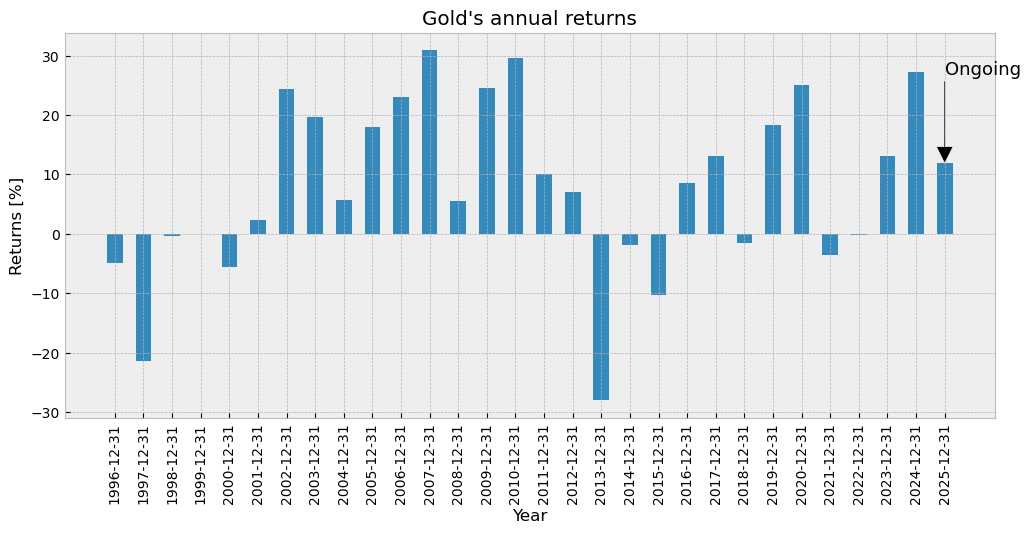

In [24]:
plt.figure(figsize=(12,5)) 
plt.bar(gold_annual_returns.index, gold_annual_returns['returns'], width=200) 
plt.xticks(gold_annual_returns.index, rotation=90)
plt.annotate('Ongoing', 
             xy=(gold_annual_returns.index[29], gold_annual_returns['returns'].iloc[29]), 
             fontsize=13,
             xytext=(gold_annual_returns.index[29], gold_annual_returns['returns'].iloc[29] + 15), 
             arrowprops=dict(facecolor='black', width=1))
plt.title("Gold's annual returns")
plt.ylabel('Returns [%]')
plt.xlabel('Year')
plt.show()

The above bar charts confirm that silver is more volatile. In 2010 silver returns exceeded 80%, on the other hand, 3 years later silver lost more than 30%. Gold returns are more stable.

**Calculate log returns**

In [25]:
df_imputed['log_returns_gold'] = np.log(df_imputed['price_gold'].div(df_imputed['price_gold'].shift(1)))

In [26]:
df_imputed['log_returns_silver'] = np.log(df_imputed['price_silver'].div(df_imputed['price_silver'].shift(1)))

In [27]:
df_imputed

,price_silver,pct_change_silver,price_gold,pct_change_gold,day,month,log_returns_gold,log_returns_silver
Date,,,,,,,,
1995-01-02,4.8900,0.00,383.15,0.08,2,1,NaN,NaN
1995-01-03,4.7500,-2.86,379.70,-0.90,3,1,-0.009045,-0.029048
1995-01-04,4.6200,-2.74,374.55,-1.36,4,1,-0.013656,-0.027750
1995-01-05,4.7100,1.95,375.55,0.27,5,1,0.002666,0.019293
1995-01-06,4.6400,-1.49,371.95,-0.96,6,1,-0.009632,-0.014974
...,...,...,...,...,...,...,...,...
2025-02-13,32.3595,0.44,2929.03,0.87,13,2,0.008699,0.004358
2025-02-14,32.1367,-0.69,2883.18,-1.57,14,2,-0.015777,-0.006909
2025-02-17,32.7900,2.03,2897.66,0.50,17,2,0.005010,0.020125


**How much 1 dollar invested in gold and silver 30 years ago would be now?**

In [28]:
np.exp(df_imputed['log_returns_gold'].sum()) 

7.661620775153328

In [29]:
np.exp(df_imputed['log_returns_silver'].sum()) 

6.687832310838415

Calculate mean annual returns and standard deviations

In [30]:
# anual mean returns gold
df_imputed['log_returns_gold'].mean() * 252 # number of business days during a year

0.06539165729650645

In [31]:
# anual mean returns silver
df_imputed['log_returns_silver'].mean() * 252

0.06102625591775513

In [32]:
df_imputed['log_returns_gold'].std() * np.sqrt(252)

0.15873235673833885

In [33]:
df_imputed['log_returns_silver'].std() * np.sqrt(252)

0.2854965823065996

It turns out Gold is less volatile and it has made 7.66X since 1995 which makes it a slightly better investment. On average, gold generates 6.5% every year based on the last 30 years. Silver has been generating 6.1% along with almost twice as high standard deviation which makes it definitely more risky asset.

In [34]:
df_imputed['cum_returns_gold'] = df_imputed['log_returns_gold'].cumsum().apply(np.exp)
df_imputed['cum_returns_silver'] = df_imputed['log_returns_silver'].cumsum().apply(np.exp)

**Plotting buy and hold chart `Gold` vs `Silver`**

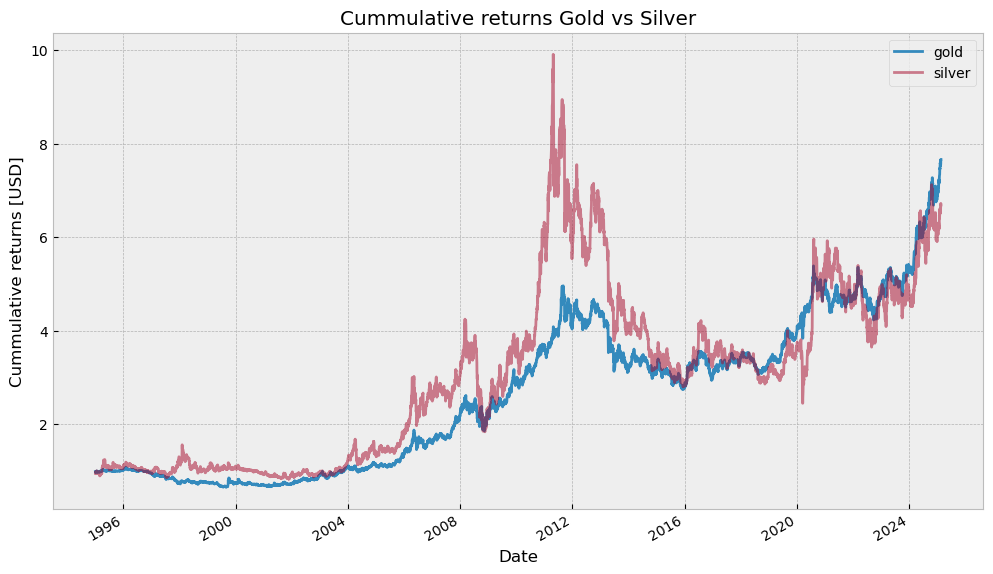

In [35]:
plt.figure(figsize=(12,7))
df_imputed['cum_returns_gold'].plot(label = 'gold')
df_imputed['cum_returns_silver'].plot(label = 'silver', alpha=0.5)
plt.title("Cummulative returns Gold vs Silver")
plt.ylabel('Cummulative returns [USD]')
plt.xlabel('Date')
plt.legend()
plt.show()

**Finding local maximums**

In [36]:
df_imputed['cummax_gold'] = df_imputed['cum_returns_gold'].cummax()
df_imputed['cummax_silver'] = df_imputed['cum_returns_silver'].cummax()

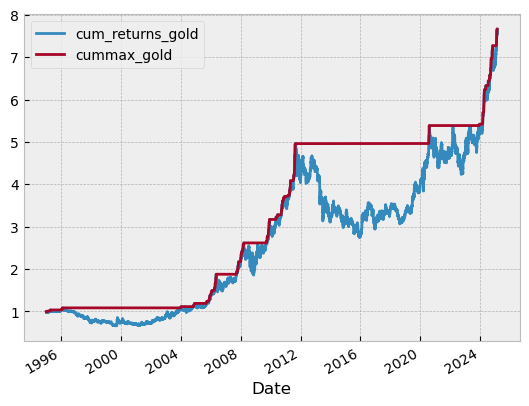

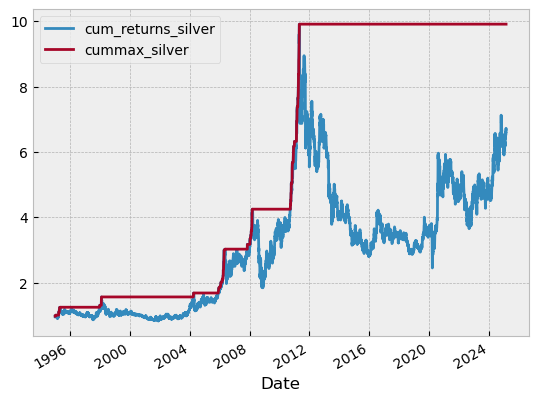

In [37]:
df_imputed[['cum_returns_gold','cummax_gold']].plot()
df_imputed[['cum_returns_silver','cummax_silver']].plot()
plt.show()

**Calculating drawdowns - how much the cumulative returns dropped from the recent maximum**

In [38]:
df_imputed['drawdown_gold'] = df_imputed['cummax_gold'] - df_imputed['cum_returns_gold']
df_imputed['drawdown_silver'] = df_imputed['cummax_silver'] - df_imputed['cum_returns_silver']
df_imputed.head()

,price_silver,pct_change_silver,price_gold,pct_change_gold,day,month,log_returns_gold,log_returns_silver,cum_returns_gold,cum_returns_silver,cummax_gold,cummax_silver,drawdown_gold,drawdown_silver
Date,,,,,,,,,,,,,,
1995-01-02,4.89,0.00,383.15,0.08,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-03,4.75,-2.86,379.70,-0.90,3,1,-0.009045,-0.029048,0.990996,0.971370,0.990996,0.97137,0.000000,0.000000
1995-01-04,4.62,-2.74,374.55,-1.36,4,1,-0.013656,-0.027750,0.977554,0.944785,0.990996,0.97137,0.013441,0.026585
1995-01-05,4.71,1.95,375.55,0.27,5,1,0.002666,0.019293,0.980164,0.963190,0.990996,0.97137,0.010831,0.008180
1995-01-06,4.64,-1.49,371.95,-0.96,6,1,-0.009632,-0.014974,0.970769,0.948875,0.990996,0.97137,0.020227,0.022495


In [39]:
df_imputed['drawdown_gold'].max() # gold's biggest drawdown - dollar perspective

2.215189873417721

In [40]:
df_imputed['drawdown_gold'].idxmax() # when it took place 

Timestamp('2015-12-17 00:00:00')

In [41]:
df_imputed.loc['2015-12-17',['cum_returns_gold','cummax_gold']]

cum_returns_gold    2.744982
cummax_gold         4.960172
Name: 2015-12-17 00:00:00, dtype: float64

It means our gold investment dropped from 4.96 dollars to 2.745 dollars.

Same calculations for silver...

In [42]:
df_imputed['drawdown_silver'].max()

7.458077709611461

In [43]:
df_imputed['drawdown_silver'].idxmax()

Timestamp('2020-03-18 00:00:00')

In [44]:
df_imputed.loc['2020-03-18',['cum_returns_silver','cummax_silver']]

cum_returns_silver    2.449898
cummax_silver         9.907975
Name: 2020-03-18 00:00:00, dtype: float64

Calculate drawdowns from percentage perspective

In [45]:
df_imputed['%drawdown_gold']= (df_imputed['cummax_gold'] - df_imputed['cum_returns_gold']) / df_imputed['cummax_gold']
df_imputed['%drawdown_silver']= (df_imputed['cummax_silver'] - df_imputed['cum_returns_silver']) / df_imputed['cummax_silver']
df_imputed.head()

,price_silver,pct_change_silver,price_gold,pct_change_gold,day,month,log_returns_gold,log_returns_silver,cum_returns_gold,cum_returns_silver,cummax_gold,cummax_silver,drawdown_gold,drawdown_silver,%drawdown_gold,%drawdown_silver
Date,,,,,,,,,,,,,,,,
1995-01-02,4.89,0.00,383.15,0.08,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-03,4.75,-2.86,379.70,-0.90,3,1,-0.009045,-0.029048,0.990996,0.971370,0.990996,0.97137,0.000000,0.000000,0.000000,0.000000
1995-01-04,4.62,-2.74,374.55,-1.36,4,1,-0.013656,-0.027750,0.977554,0.944785,0.990996,0.97137,0.013441,0.026585,0.013563,0.027368
1995-01-05,4.71,1.95,375.55,0.27,5,1,0.002666,0.019293,0.980164,0.963190,0.990996,0.97137,0.010831,0.008180,0.010930,0.008421
1995-01-06,4.64,-1.49,371.95,-0.96,6,1,-0.009632,-0.014974,0.970769,0.948875,0.990996,0.97137,0.020227,0.022495,0.020411,0.023158


In [46]:
df_imputed['%drawdown_gold'].max()

0.44659535172508297

In [47]:
df_imputed['%drawdown_gold'].idxmax()

Timestamp('2015-12-17 00:00:00')

In [48]:
df_imputed['%drawdown_silver'].max()

0.7527347781217767

In [49]:
df_imputed['%drawdown_silver'].idxmax()

Timestamp('2020-03-18 00:00:00')

From percentage perspective the biggest drawdown for gold was almost 45% and 75% for silver.

### Exploring Gold/Silver ratio

Gold/Silver ratio tells us how many ounces of silver it takes to buy 1 ounce of gold

In [50]:
df_imputed['ratio'] = round(df_imputed['price_gold'].div(df_imputed['price_silver']),2)

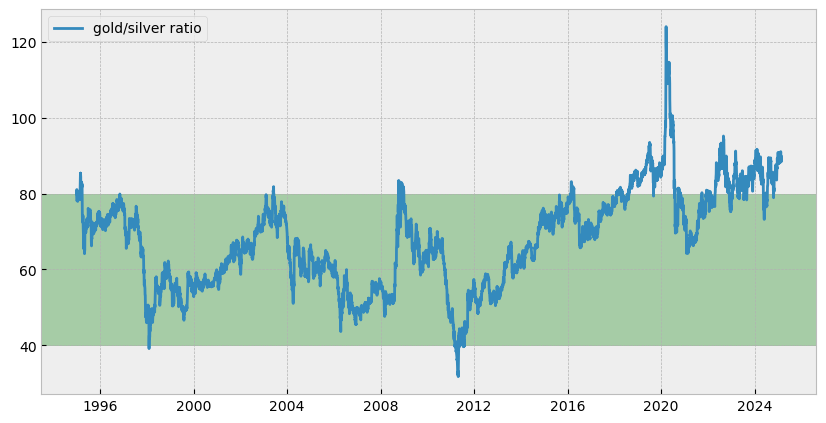

In [51]:
plt.style.use('bmh')
plt.figure(figsize=(10,5))
plt.plot(df_imputed['ratio'], label='gold/silver ratio')
plt.axhspan(40, 80, color='green', alpha=0.3)
plt.legend()
plt.show()

Historically the ratio has varied in 40:1 - 80:1 range. Times when the ratio is out of range may be considered an interesting anomaly.

### Performance during recessions

Data regarding recessions comes from [fredapi]('https://pypi.org/project/fredapi/'), which is a Python API for the FRED data provided by the Federal Reserve Bank of St. Louis. In order to access it, an API key is required.

In [52]:
load_dotenv()
api_key=os.environ.get('FredAPI')
fred = fa.Fred(api_key)

I have looked for datasets related to term 'recession':

In [53]:
fred.search('Recession')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SAHMREALTIME,SAHMREALTIME,2025-02-27,2025-02-27,Real-time Sahm Rule Recession Indicator,1959-12-01,2025-01-01,Monthly,M,Percentage Points,Percentage Points,Seasonally Adjusted,SA,2025-02-07 07:59:03-06:00,80,Sahm Recession Indicator signals the start of ...
RECPROUSM156N,RECPROUSM156N,2025-02-27,2025-02-27,Smoothed U.S. Recession Probabilities,1967-06-01,2024-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-02-03 09:54:02-06:00,73,Smoothed recession probabilities for the Unite...
JHDUSRGDPBR,JHDUSRGDPBR,2025-02-27,2025-02-27,Dates of U.S. recessions as inferred by GDP-ba...,1967-10-01,2024-07-01,Quarterly,Q,+1 or 0,+1 or 0,Not Seasonally Adjusted,NSA,2025-01-30 19:01:01-06:00,69,The series assigns dates to U.S. recessions ba...
USREC,USREC,2025-02-27,2025-02-27,NBER based Recession Indicators for the United...,1854-12-01,2025-01-01,Monthly,M,+1 or 0,+1 or 0,Not Seasonally Adjusted,NSA,2025-02-03 18:01:01-06:00,69,This time series is an interpretation of US Bu...
USRECD,USRECD,2025-02-27,2025-02-27,NBER based Recession Indicators for the United...,1854-12-01,2025-02-25,"Daily, 7-Day",D,+1 or 0,+1 or 0,Not Seasonally Adjusted,NSA,2025-02-26 18:02:04-06:00,53,This time series is an interpretation of US Bu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DHIDFHRVIEHS,DHIDFHRVIEHS,2025-02-27,2025-02-27,DHI-DFH Index of Recruiting Intensity per Vaca...,2001-01-01,2018-04-01,Monthly,M,Index,Index,Not Seasonally Adjusted,NSA,2018-06-11 09:21:04-05:00,1,Monthly updates of the DHI Hiring Indicators h...
DHIDFHRIVMW,DHIDFHRIVMW,2025-02-27,2025-02-27,DHI-DFH Index of Recruiting Intensity per Vaca...,2001-01-01,2018-04-01,Monthly,M,Index,Index,Not Seasonally Adjusted,NSA,2018-06-11 09:21:04-05:00,0,Monthly updates of the DHI Hiring Indicators h...
DHIDFHRVIHS,DHIDFHRVIHS,2025-02-27,2025-02-27,DHI-DFH Index of Recruiting Intensity per Vaca...,2001-01-01,2018-04-01,Monthly,M,Index,Index,Not Seasonally Adjusted,NSA,2018-06-11 09:21:04-05:00,0,Monthly updates of the DHI Hiring Indicators h...


I looks like `JHDUSRGDPBR` dataset is what's needed to perform the analysis.

In [54]:
# Read the notes to understand the data
fred.search('Recession').loc['JHDUSRGDPBR','notes']

'The series assigns dates to U.S. recessions based on a mathematical model of the way that recessions differ from expansions. Whereas the NBER business cycle dates are based on a subjective assessment of a variety of indicators, the dates here are entirely mechanical and are calculated solely from historically reported GDP data. Whenever the GDP-based recession indicator index rises above 67%, the economy is determined to be in a recession. The date that the recession is determined to have begun is the first quarter prior to that date for which the inference from the mathematical model using all data available at that date would have been above 50%. The next time the GDP-based recession indicator index falls below 33%, the recession is determined to be over, and the last quarter of the recession is the first quarter for which the inference from the mathematical model using all available data at that date would have been below 50%.  For more information about this series visit http://ec

**Load the data:**

In [55]:
recession = fred.get_series('JHDUSRGDPBR')
# Filter recession quarters starting from 1995
recession[recession==1].loc['1995':]

2001-01-01    1.0
2001-04-01    1.0
2001-07-01    1.0
2007-10-01    1.0
2008-01-01    1.0
2008-04-01    1.0
2008-07-01    1.0
2008-10-01    1.0
2009-01-01    1.0
2009-04-01    1.0
2020-01-01    1.0
2020-04-01    1.0
dtype: float64

In [56]:
# Prepare recession ranges to be plotted according to the rules stated in the notes

# first recession
x1_min, x1_max = '2000-10-01', '2001-07-01'
# second recession
x2_min, x2_max = '2007-07-01', '2009-04-01'
# third recession
x3_min, x3_max = '2019-10-01', '2020-04-01'

rec_periods = [(x1_min, x1_max),(x2_min, x2_max),(x3_min, x3_max)]

**Plot gold and silver price as well as gold/silver ratio to observe the impact of recessions**

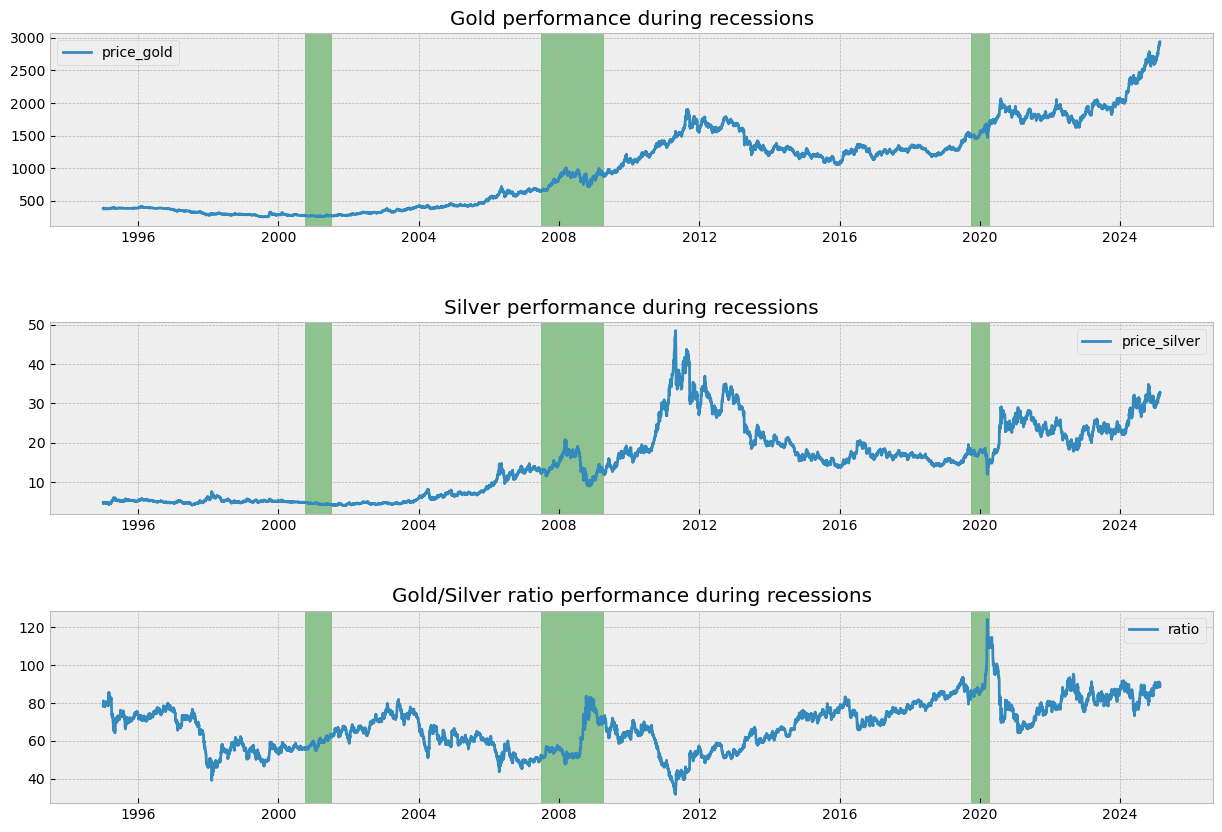

In [57]:
plt.style.use('bmh')
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

titles = ["Gold performance during recessions", 
          "Silver performance during recessions", 
          "Gold/Silver ratio performance during recessions"]

columns = ['price_gold', 'price_silver', 'ratio']

for i, (title, col) in enumerate(zip(titles, columns), 1):
    plt.subplot(3, 1, i)
    plt.plot(df_imputed[col], label=col)
    plt.title(title)
    plt.legend()

    for r in rec_periods:
        plt.axvspan(r[0], r[1], color='green', alpha=0.4)

plt.show()


Remarks: Green-shaded periods represent recessions in the USA. 

### Summary

Based on the data collected from `investing.com` website, the analysis of Gold and Silver performance was conducted. The analysis showed that Gold slightly outperformed Silver within the analysed period (1995-2025). What is more, the standard deviation of Silver's returns is significantly larger what makes silver more risky investment. The biggest drawdown took place on 2020-03-18 (covid crush). It was 75%-drop from the peak in 2011! Gold's biggest drawdown was 44% and it took place on 
2015-12-17.

However, further analysis showed that at the time of the analysis (2025-02) the Gold/Silver ratio is at relatively high levels (historically) what could suggest it will drop in the near future. If so, silver could catch up a little bit or even outperform Gold.
Finally, data regarding recession periods in the USA was collected from FRED API (Federal Reserve Economic Data) and used to 
visualize the performance of both metals during recession. Within analyzed period there were 3 recessions. In all 3 cases gold/silver ratio increased significantly.  
